In [1]:
# %load scripts/plotmodel.py
#!/usr/bin/env python
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

f=open('model_true/proc000000_x.bin',"rb")
x=np.fromfile(f,dtype=np.float32)
f=open('model_true/proc000000_z.bin',"rb")
z=np.fromfile(f,dtype=np.float32)
f=open('model_true/proc000000_vs.bin',"rb")
vs=np.fromfile(f,dtype=np.float32)

plt.figure(figsize=(10,4))
sc=plt.tripcolor(x,z,vs,cmap='jet_r',vmin=4000,vmax=5500)

plt.plot(src['x'],src['z'],'r*')
plt.plot(rc['x'],rc['z'],'yv')
for ii in range(len(src)):
    plt.text(src['x'].iloc[ii],src['z'].iloc[ii],str(ii),color='m')
plt.xlabel('x(km)')
plt.ylabel('z(km)')
plt.xlim([x.min(),x.max()])
plt.ylim([z.min(),z.max()])
plt.colorbar()
#plt.gca().invert_yaxis()
#plt.savefig('invertvs.png')


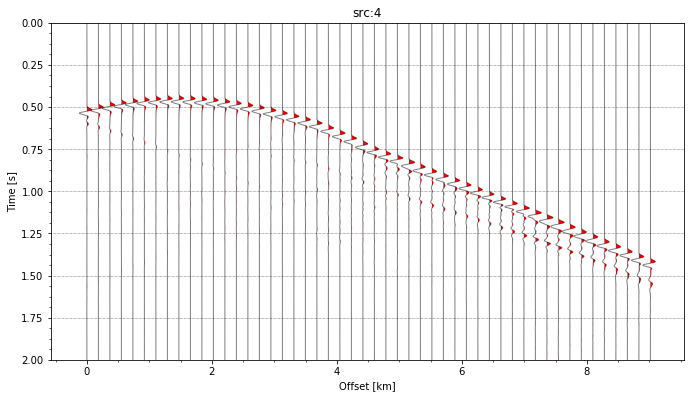

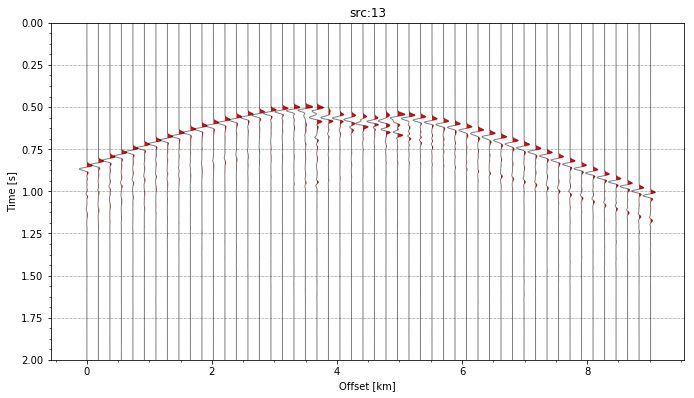

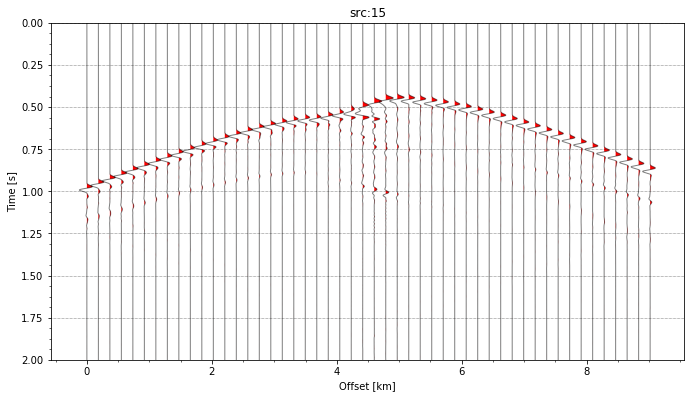

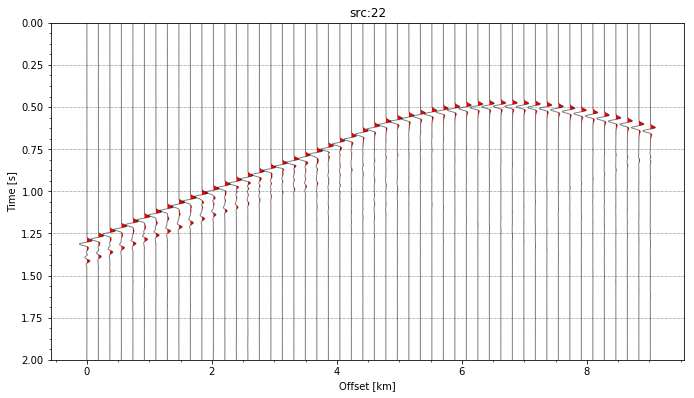

In [15]:
from obspy import read
from matplotlib import pyplot as plt
choosetoshow = [4,13,15,22]
for isrc  in range(len(choosetoshow)):
    st = read('data/000'+str(choosetoshow[isrc]).zfill(2)+'/Uy_file_single.su')
    fig = plt.figure(figsize=(10,6))
    for ii in range(len(st)):
        st[ii].stats.distance=ii*1000/50.0*9.2
    st.plot(type='section',scale=1.0,time_down=True,recordlength=2,fillcolors=('red','None'),fig=fig)
    plt.title('src:'+str(choosetoshow[isrc]))
